<a href="https://colab.research.google.com/github/maluperroni/desafio_final_shePY/blob/main/desafio_final_shePY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### As maiores Fake News em 2017

Não sabemos exatamente quando as fake news começaram a surgir, ao que tudo indica esse "telefone sem fio" de notícias falaciosas existe desde quando o mundo é mundo. Afinal, quem não se lembra da famosa história que correu nas escolas públicas nos anos 2000 sobre o pacto da Xuxa com o diabo? 

![](https://i.makeagif.com/media/2-21-2018/p-X4WS.gif)


Mas foi a partir das redes que elas ganharam uma proporção gigantesca, manipulando a opinião pública, decidindo eleições e criando realidades ilusórias.

O documentáio *Nada é Privado: O Escândalo da Cambridge Analytica* analisa o papel das fake news nas eleições Norte Americanas em 2016, apontando essa tática como a principal utitlizada por Trump na decisão de sua vitória. Desde então, o tema das fake news tem ganhado relevância e aberto diversas discussões na sociedade civil. 

Em dezembro de 2017 o BuzzFeed News publicou o artigo **"Estes são os 50 maiores sucessos de notícias falsas no Facebook em 2017"**, apresentando quais foram os posts mais virais do ano nos EUA. 

A nossa ideia é apresentar esses dados e tentar entender o que estava sendo divulgado como notícia falsa no primeiro ano de mandato do Trump. 


![](https://miro.medium.com/max/1200/1*RVecOp7yWgTUWbAa5G4f5g.gif)

---



In [63]:
#Importando as bibliotecas que vão nos ajudar a visualizar os dados 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

In [64]:
#Lendo o dataframe com a biblioteca pd
df_fn = pd.read_csv('https://raw.githubusercontent.com/BuzzFeedNews/2017-12-fake-news-top-50/master/data/top_2017.csv')
df_fn.head()

,title,url,domain,fb_engagements,published_date,category
0,Babysitter transported to hospital after inserting a baby in her vagina,http://worldnewsdailyreport.com/babysitter-transported-to-hospital-after-inserting-a-baby-in-her-vagina/,worldnewsdailyreport.com,1204400,2017-05-03,Medical
1,"FBI seizes over 3,000 penises during raid at morgue employee’s home",http://worldnewsdailyreport.com/fbi-seizes-over-3000-penises-during-raid-at-morgue-employees-home/,worldnewsdailyreport.com,1145470,2017-09-25,Crime
2,"Charles Manson to be released on parole, to Johnson County, TX",http://www.breakingnews365.net/59690fb994b9c/charles-manson-to-be-released-on-parole-to-johnson-county-tx.html,breakingnews365.net,1125031,2017-07-14,Crime
3,Police: Chester Bennington Was Murdered,http://yournewswire.com/chester-bennington-murdered/,yournewswire.com,1042032,2017-07-21,Crime
4,Morgue employee cremated by mistake while taking a nap,https://worldnewsdailyreport.com/morgue-employee-cremated-by-mistake-while-taking-a-nap/,worldnewsdailyreport.com,993205,2017-03-01,Crime


##Análise exploratória

In [3]:
df_fn.shape

(50, 6)

Nosso DataFrame é composto por 50 linhas, cada uma correspondendo a uma fake news. Além disso, há 6 colunas com informações sobre o título, a url e o domínio onde a fake news foi publicada originalmente, o número de engajamentos recebecidos no facebook(sendo este, inclusive, o critério que ordena as notícias no DataFrame) a data de publicação e a categoria a qual a notícia pertence.





In [4]:
df_fn.describe()

,fb_engagements
count,5.000000e+01
mean,4.699730e+05
std,2.832482e+05
min,2.313610e+05
25%,2.679388e+05
50%,3.337690e+05
75%,5.821185e+05
max,1.204400e+06


O describe nos ajuda a ter uma noção do quanto essas notícias falsas foram veículadas. A top 1 das notícias que mais foram divulgadas, recebeu cerca de **1.204.400** engajamentos. 

![](https://miro.medium.com/max/500/1*gZtUL3pzZaiSDWMPnv3H2g.gif)

 Se você é tão ruim em matemática quanto eu isso significa que a notícia *Babysitter transported to hospital after inserting a baby in her vagina (
Babá transportada para o hospital após inserir um bebê na vagina)* foi compartilhada, curtida e comentada cerca de 1 milhão 204 mil e 400 vezes!!!

![](https://s2.glbimg.com/fFkYr1DBZDrs2XMnqWMnhoOr5w4=/512x320/smart/e.glbimg.com/og/ed/f/original/2019/12/02/joe-friends-assustado.gif)

Ninguém imaginaria que essa manchete seria uma fake news, né?!

A média dos engajamentos ficou entre **469 mil** e o engajamento mais baixo foi de **231 mil** (não tão baixo assim, né?!)



Analisando o gênero das notícias

In [5]:
df_fn['category'].unique()

array(['Medical', 'Crime', 'Politics', 'Breaking News', 'Business',
       'Race', 'Local News', 'World', 'Music', 'Religion', 'Sports'],
      dtype=object)

Mas se enganou quem pensou que só tiveram fake news relacionadas a política. Teve de tuuuudo nesse mar de mentiras, desde fake news sobre medicina, crime, negócios, música, esporte e até religião. 

In [6]:
df_fn['category'].value_counts()

Crime            20
Politics         11
Medical           4
World             4
Business          3
Breaking News     2
Race              2
Sports            1
Local News        1
Religion          1
Music             1
Name: category, dtype: int64

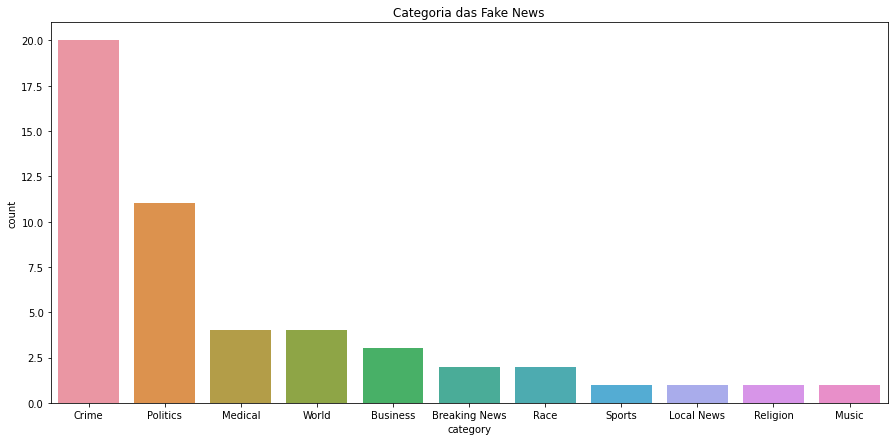

In [14]:
plt.figure(figsize=(15,7))
sns.countplot(x='category',data=df_fn, order=df_fn['category'].value_counts().index).set_title('Categoria das Fake News');

Mas, apesar da variedade, as fake news sobre política continuaram entre as mais divulgadas. Afinal de contas, o fatídico ano de 2017, em que Trump assumiu a presidência dos EUA, foi um ano bastante agitado politicamente no país. 

![](https://i.giphy.com/3o7abkti7UphSopcl2.gif)

###**Vamos ao que interessa: Mas sobre o quê exatamente as fake news de política tratavam?**

In [9]:
pd.get_option('max_colwidth')

50

In [10]:
pd.set_option('max_colwidth', None) #Vamos utilizar o set_option para expandir os caracters. None permite que não haja essa limitação.

In [11]:
df_fn.columns

Index(['title', 'url', 'domain', 'fb_engagements', 'published_date',
       'category'],
      dtype='object')

In [12]:
df_politics= df_fn.query('category=="Politics"')
df_politics

,title,url,domain,fb_engagements,published_date,category
6,Female Legislators Unveil 'Male Ejaculation Bill' Forbidding The Disposal Of Unused Semen,http://www.burrardstreetjournal.com/female-legislators-unveil-male-ejaculation-bill/,burrardstreetjournal.com,966498,2017-01-23,Politics
7,President Trump Orders the Execution of Five Turkeys Pardoned by Obama,http://realnewsrightnow.com/2017/01/president-trump-orders-execution-five-turkeys-pardoned-obama/,realnewsrightnow.com,914429,2017-01-24,Politics
13,LAW PASSED: All Child Support in the United States Will End by Beginning of 2018,http://tmzbreaking.com/law-passed-all-child-support-in-the-united-states-will-end-by-beginning-of-2018,tmzbreaking.com,558201,2017-09-24,Politics
14,Popeyes manager arrested for allegedly dipping chicken in cocaine based flour to increase business sales. - Channel22News.com,http://channel22news.com/popeyes-manager-arrested-for-allegedly-dipping-chicken-in-cocaine-based-flour-to-increase-business-sales/,channel22news.com,545320,2017-09-20,Politics
16,CIA Agent Confesses On Deathbed: 'We Blew Up WTC 7 On 9/11',http://yournewswire.com/cia-911-wtc7/,yournewswire.com,423549,2017-07-14,Politics
17,Celebrities Call For 'Total Hollywood Strike' Until Trump Resigns,http://yournewswire.com/hollywood-strike-trump-resign/,yournewswire.com,416123,2017-11-07,Politics
18,NPR: 25 Million Votes For Clinton 'Completely Fake',http://yournewswire.com/npr-25-million-fake-clinton-votes/,yournewswire.com,394781,2017-07-13,Politics
19,World's most popular candy to be removed from shelves by October 2017!,http://www.breakingnews247.net/59bc13819a723/world-s-most-popular-candy-to-be-removed-from-shelves-by-october-2017.html,breakingnews247.net,390453,2017-01-09,Politics
20,Se extiende la edad para jubilarse,http://www.12minutos.com/58f7d2c435970/se-extiende-la-edad-para-jubilarse.html,12minutos.com,389957,2017-01-29,Politics
26,WikiLeaks: Clinton Bribed 6 Republicans To 'Destroy Trump',http://yournewswire.com/wikileaks-clinton-bribed-6-republicans/,yournewswire.com,332300,2017-12-05,Politics


In [37]:
engagements_trump = [327281, 332300, 389957, 394781, 416123, 558201, 914429]
engagements_outros = [390453, 423549, 545320, 966498]

soma_trump = sum(engagements_trump)
soma_outros = sum(engagements_outros)
soma_total = [soma_trump, soma_outros]

In [62]:
news_politics = ['Eleições e governo Trump', 'Outros']
engagements_politics = [soma_trump, soma_outros]

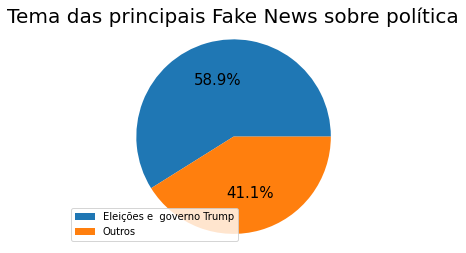

In [61]:
plt.pie(soma_total, labels=None, autopct='%1.1f%%', radius= 2, textprops = {"fontsize": 15}, )
plt.axis("equal")
plt.title("Tema das principais Fake News sobre política", fontsize=20)
plt.legend(news_politics, loc=3);

Dentre as notícias que estavam categorizadas como "Política", nós classificamos aquelas que possivelmente tinha relação com as eleições de 2016 e o governo Trump. Dentre essas estão fake news como: *No more child support after 2017!!!!!! (Não há mais pensão alimentícia depois de 2017)* ,  *NPR: 25 Million Votes For Clinton 'Completely Fake' (NPR:25 milhões de votos para Clinton 'Completamente falso')* e *President Trump Orders the Execution of Five Turkeys Pardoned by Obama* (Presidente Trump ordena a execução de cinco perus perdoados por Obama). 

Em nossa classificação, quase 60% das notícias apresentaram alguma relação com as eleições de 2016 e seus desdobramentos. 